## 1) Library & Data Import

In [58]:
#시각화 라이브러리가 노트북상에서 제대로 보여지도록하는 라이브러리 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [60]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#### Feature Description
- TOWN : 지역 이름
- LON, LAT : 위도, 경도 정보
- **CMEDV : 해당 지역의 집값(중간값)**
- CRIM : 근방 범죄율
- ZN : 주택지 비율
- INDUS : 상업적 비즈니스에 활용되지 않는 농지 면적
- CHAS : 경계선에 강에 있는지 여부
- NOX : 산화 질소 농도
- RM : 자택당 평균 방 갯수
- AGE : 1940 년 이전에 건설된 비율
- DIS : 5 개의 보스턴 고용 센터와의 거리에 다른 가중치 부여
- RAD : radial 고속도로와의 접근성 지수
- TAX : 10000달러당 재산세
- PTRATIO : 지역별 학생-교사 비율
- B : 지역의 흑인 지수 (1000(B - 0.63)^2), B는 흑인의 비율.
- LSTAT : 빈곤층의 비율

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 회귀 분석 종속(목표) 변수 탐색

##### 데이터셋 기본 정보 탐색

In [61]:
df.shape

(506, 17)

In [62]:
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


##### 'CMEDV' 피처 탐색

In [64]:
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

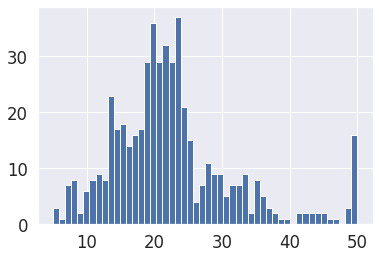

In [65]:
df['CMEDV'].hist(bins= 50)

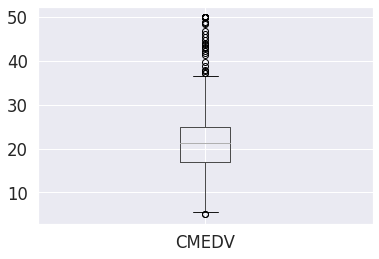

In [66]:
df.boxplot(column= ['CMEDV'])

-----

### 2-2) 회귀 분석 설명 변수 탐색

##### 설명 변수들의 분포 탐색

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd35777dcf8>,
      dtype=object)

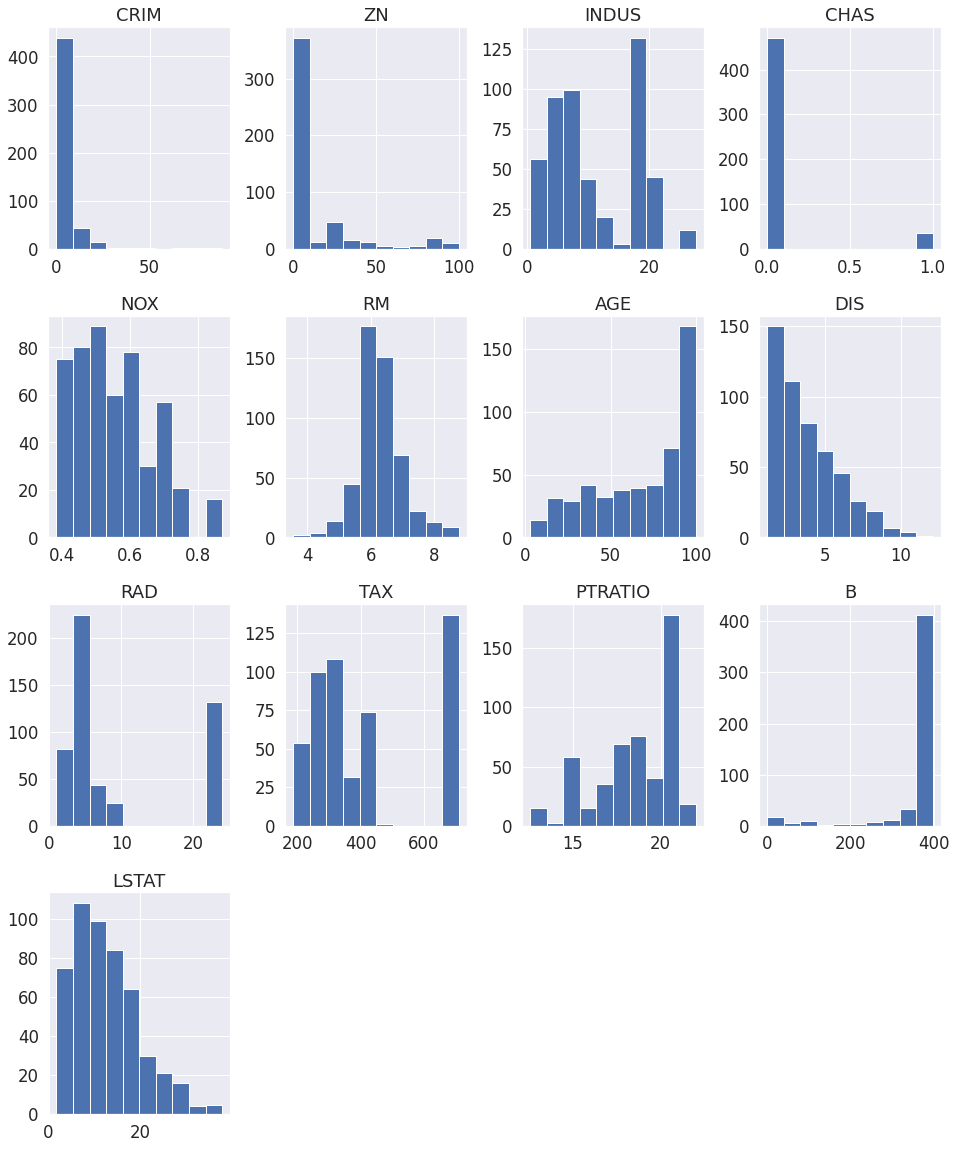

In [67]:
numerical_columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
fig = plt.figure(figsize=(16,20))
ax = fig.gca()
df[numerical_columns].hist(ax=ax)
#fig 새 팔레트를 생성
#gca 좌표 반환(?)

##### 설명 변수들의 상관관계 탐색

In [68]:
cols= ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
corr = df[cols].corr(method ='pearson') #df.corr  =  각 항목간의 상관관계 분석
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


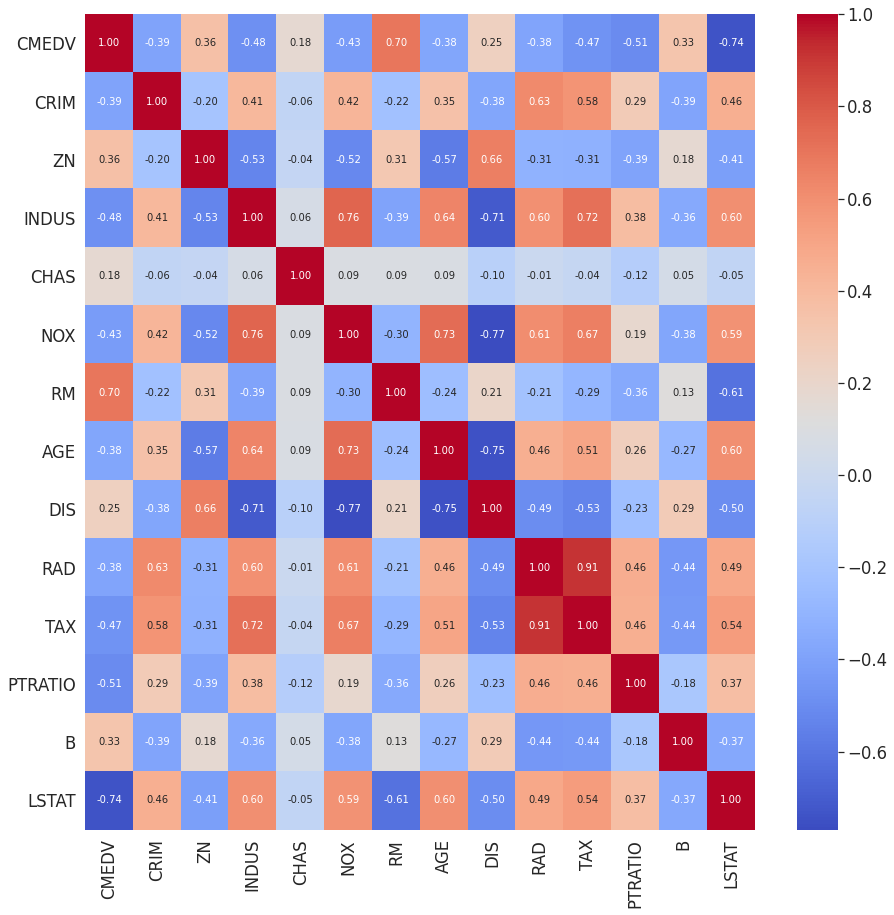

In [69]:
#fig = plt.figure(figsize=(15, 15))
#ax = fig.gca()
#sns.set(font_scale=1.5)
#hm = sns.heatmap(corr.values, annot=True, fmt='.2f', yticklabels= cols, xticklabels=cols, ax=ax)#fmt='.2f'  소수점 두째자리까지 표시
#plt.tight_layout()
#plt.show()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

##### 설명 변수와 종속 변수의 관계 탐색

Text(0, 0.5, 'CMEDV')

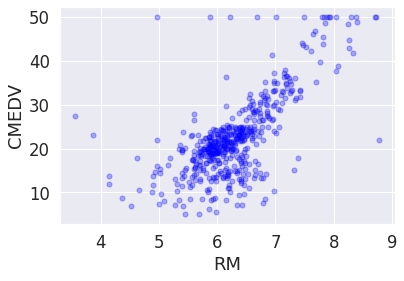

In [70]:
plt.plot('RM', 'CMEDV', data=df, marker = 'o', markersize = 5, linestyle = 'none', color= 'blue', alpha = 0.3, )
plt.xlabel('RM')
plt.ylabel('CMEDV')

Text(0, 0.5, 'CMEDV')

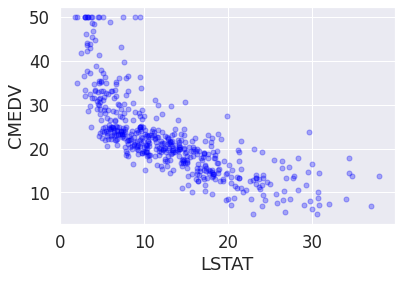

In [71]:
plt.plot('LSTAT', 'CMEDV', data=df, marker = 'o', markersize = 5, linestyle = 'none', color= 'blue', alpha = 0.3)
plt.xlabel('LSTAT')
plt.ylabel('CMEDV')

##### 지역별 차이 탐색

In [72]:
df['TOWN'].value_counts()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Nahant                1
Dover                 1
Middleton             1
Topsfield             1
Sherborn              1
Name: TOWN, Length: 92, dtype: int64

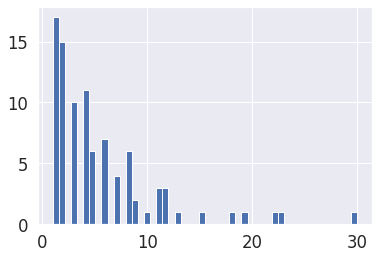

In [73]:
df['TOWN'].value_counts().hist(bins = 50) #대부분의 town이 0~10개의 데이터를 가지고있음

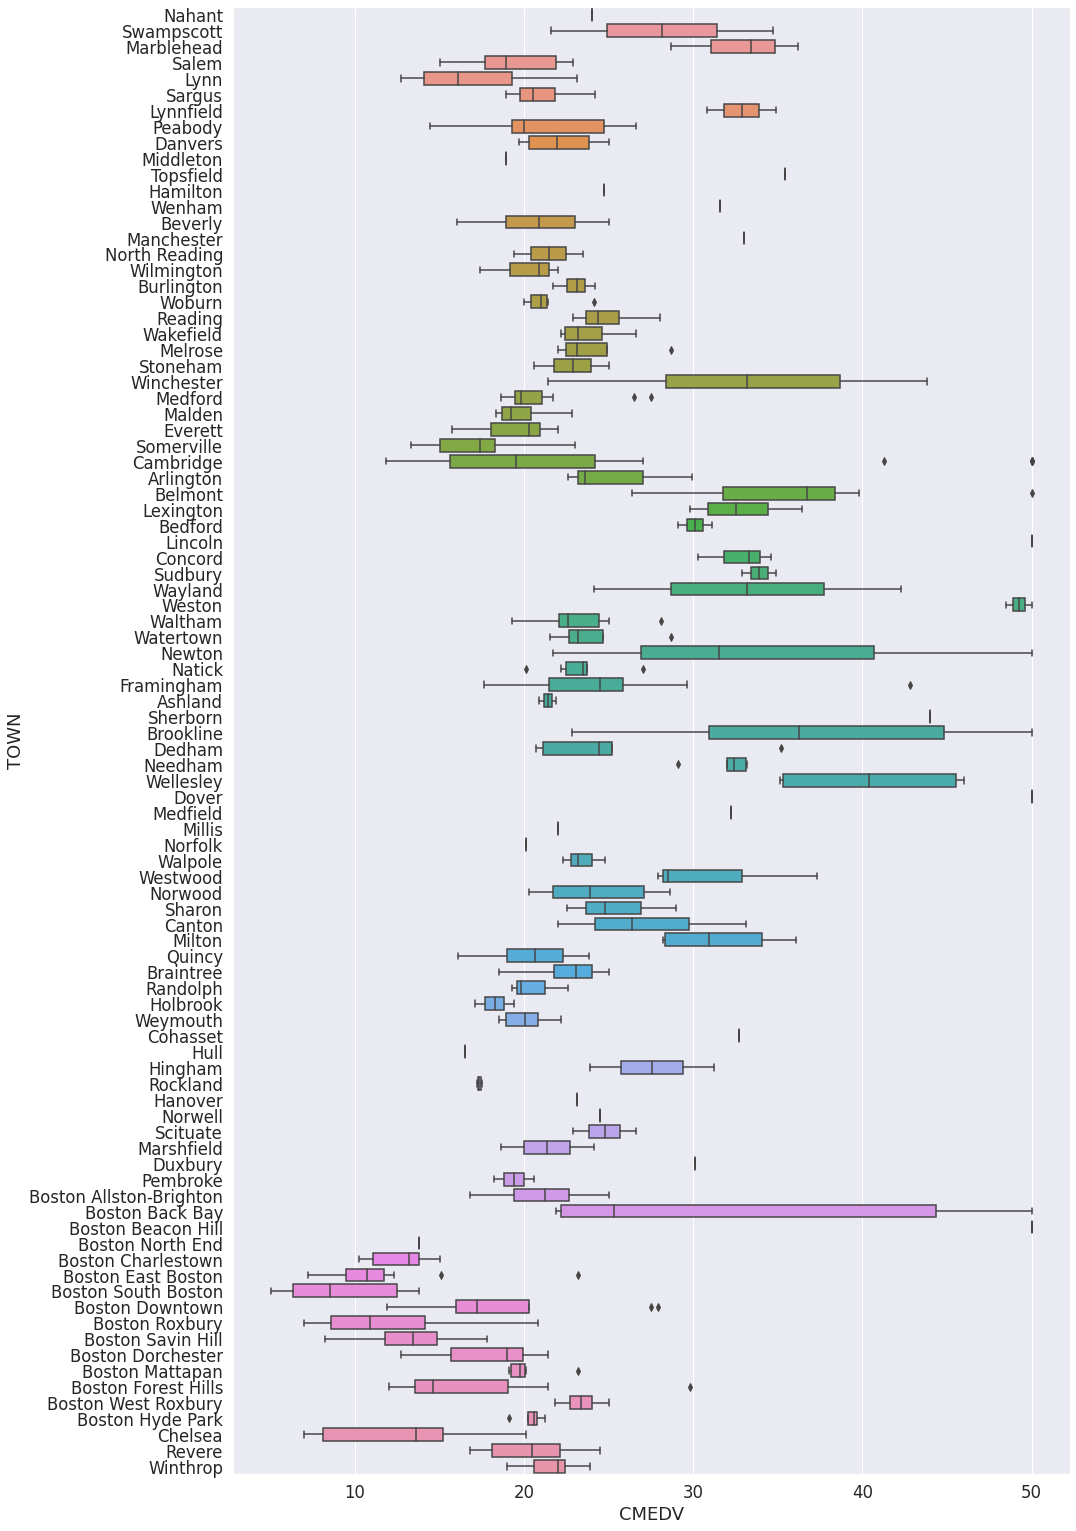

In [74]:
plt.figure(figsize=(15,27))
sns.boxplot(x = 'CMEDV', y= 'TOWN', data = df)

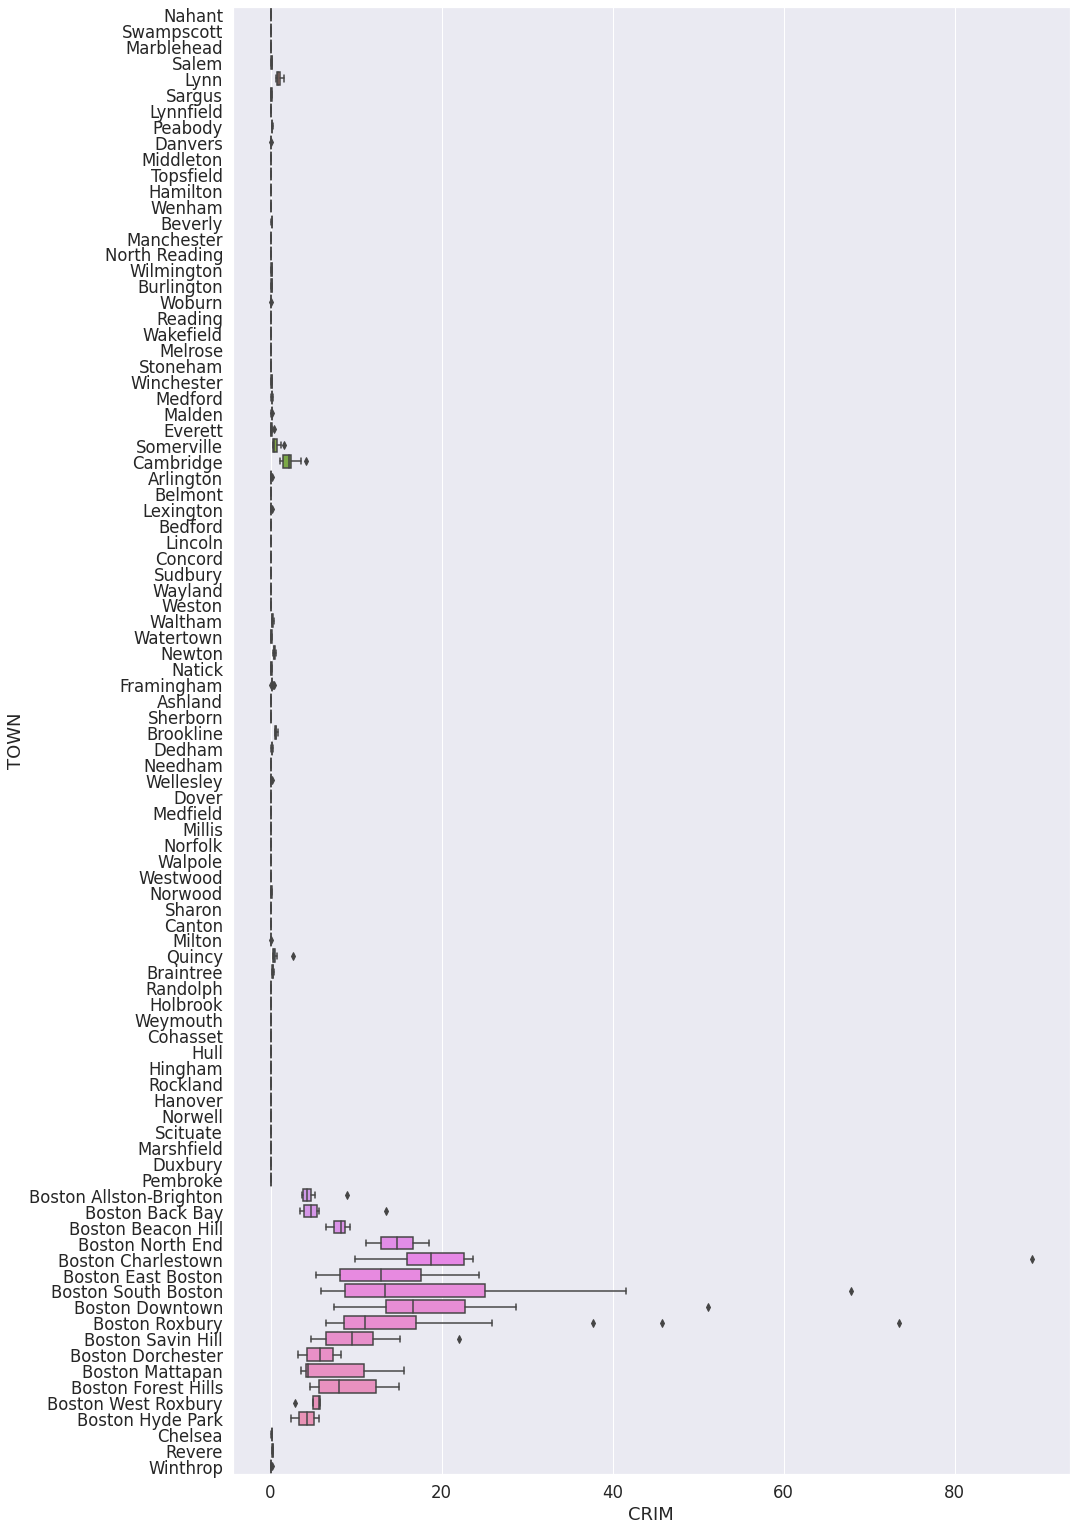

In [75]:
plt.figure(figsize=(15,27))
sns.boxplot(x = 'CRIM', y= 'TOWN', data = df)

-----

## 3) 집값 예측 분석 : 회귀분석

### 3-1) 데이터 전처리

##### 피처 표준화

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
std_scaler = StandardScaler()
scale_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = std_scaler.fit_transform(df[scale_columns])  #일부 컬럼만 scale후 덮어씌우기
#scale 제외 컬럼 = 타운이름, 위도, 경도, 가격

In [78]:
df

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.9500,42.2875,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.9360,42.2830,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.9280,42.2930,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.9220,42.2980,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,-70.9860,42.2312,22.4,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,Winthrop,-70.9910,42.2275,20.6,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,Winthrop,-70.9948,42.2260,23.9,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,Winthrop,-70.9875,42.2240,22.0,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


##### 데이터셋 분리

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(df[scale_columns], df['CMEDV'], test_size= 0.2, random_state = 33) #test_size = 0.2   train:test = 0.8:0.2

In [81]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

-----

### 3-2) 회귀 분석 모델 학습

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [83]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)

In [84]:
lr.coef_ #0에 가까울수록 영향 적음

array([-0.95549078,  1.18690662,  0.22303997,  0.76659756, -1.78400866,
        2.83991455, -0.05556583, -3.28406695,  2.84479571, -2.33740727,
       -1.77815381,  0.79772973, -4.17382086])

Text(0.5, 0, 'coef')

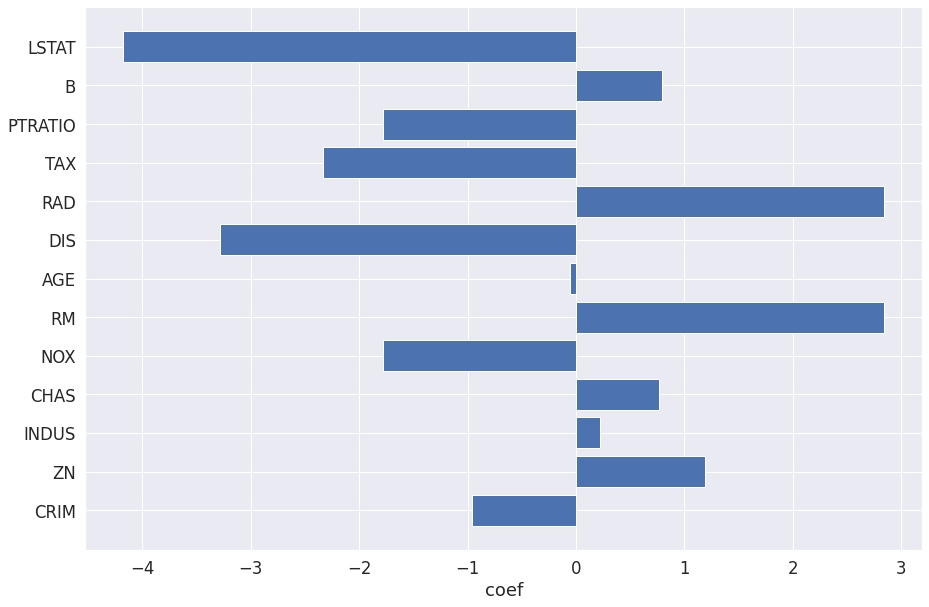

In [85]:
#plt.rcParams['figuer.figsize'] = [12,16]
#coefs = lr.coef_.tolist()
#coefs_series = pd.Series(coefs)
#ax = coefs_series.plot.barh()

plt.figure(figsize=(15, 10))
plt.barh(scale_columns, lr.coef_)
plt.xlabel('coef')

-----

### 3-3) 학습 결과 해석

##### R2 score, RMSE score 계산

In [86]:
model.score(x_train, y_train)

0.7490284664199387

In [87]:
model.score(x_test, y_test)

0.700934213532155

In [88]:
pred = lr.predict(x_train)
print(sqrt(mean_squared_error(pred, y_train)))

pred = lr.predict(x_test)
print(sqrt(mean_squared_error(pred, y_test)))

4.672162734008587
4.61495178491331


##### 피처 유의성 검정

In [89]:
import statsmodels.api as sm

In [90]:
x_train = sm.add_constant(x_train) #x_train dataframe에 const라는 컬럼을 추가, constant삽입
model = sm.OLS(y_train, x_train).fit()
model.summary()



#from statsmodels.api import ols
#model = ols(y_train, x_train).fit()
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     89.54
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          2.61e-108
Time:                        08:48:10   Log-Likelihood:                -1196.1
No. Observations:                 404   AIC:                             2420.
Df Residuals:                     390   BIC:                             2476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4800      0.238     94.635      0.000      22.013      22.947
CRIM          -0.9555      0.299     -3.192      0.002      -1.544      -0.367
ZN             1.1869      0.353      3.362      0.001       0.493       1.881
INDUS          0.2230      0.470      0.475      0.635      -0.700       1.147
CHAS           0.7666      0.238      3.227      0.001       0.300       1.234
NOX           -1.7840      0.512     -3.482      0.001      -2.791      -0.777
RM             2.8399      0.326      8.723      0.000       2.200       3.480
AGE           -0.0556      0.410     -0.135      0.892      -0.862       0.751
DIS           -3.2841      0.491     -6.695      0.000      -4.248      -2.320
RAD            2.8448      0.650      4.375      0.000       1.566       4.123
TAX           -2.3374      0.717     -3.259      0.001      -3.748      -0.927
PTRATIO       -1.7782      0.312     -5.700      0.000      -2.391      -1.165
B              0.7977      0.293      2.725      0.007       0.222       1.373
LSTAT         -4.1738      0.405    -10.317      0.000      -4.969      -3.378
==============================================================================
Omnibus:                      167.528   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.057
Skew:                           1.774   Prob(JB):                    1.00e-167
Kurtosis:                       8.753   Cond. No.                         9.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 다중 공선성

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif = pd.DataFrame()
vif['feature'] = x_train.columns
vif['VIF Facotr'] = [variance_inflation_factor(x_train.values, i) for i in range (x_train.shape[1])] 

In [93]:
vif.round(1)#소수점 1의자리까지 출력 
#다중 공선성의 기준은 10이기 때문에 크게 문제되는feature는 없음

,feature,VIF Facotr
0,const,1.0
1,CRIM,1.7
2,ZN,2.2
3,INDUS,3.9
4,CHAS,1.1
5,NOX,4.4
6,RM,1.9
7,AGE,3.1
8,DIS,4.1
9,RAD,6.9
